In [34]:
from dataframe import *
import matplotlib.pyplot as plt


class DataFrame():
    '''
    Macaco.DataFrame
    '''
    
    def __init__(self,dados=None):
        self.df = dataframe()
        self.columns = {}
        self.shape = [0,0]
        if dados != None:
            for coluna in dados:
                self.addColumn(dados[coluna], str(coluna))

    def addColumn(self, values, col_name):
        # Infere o tipo do dado. Caso encontre multiplos,
        # transforma em string
    
        if all(isinstance(x, int) for x in values):
            if self.shape == [0,0]:
                self.df.addIntColumn(values, col_name)
                self.columns[col_name] ='int'
                self.shape[1] += 1
                self.shape[0] = len(values)
                
            elif self.shape[0] != len(values):
                raise ValueError("Columns with different sizes")
                
            else:
                self.df.addIntColumn(values, col_name)
                self.columns[col_name] ='int'
                self.shape[1] += 1

        elif all(isinstance(x, (float,int)) for x in values):
            if self.shape == [0,0]:
                self.df.addDoubleColumn(values, col_name)
                self.columns[col_name] ='double'
                self.shape[1] += 1
                self.shape[0] = len(values)
                
            elif self.shape[0] != len(values):
                raise ValueError("Columns with different sizes")
                
            else:
                self.df.addDoubleColumn(values, col_name)
                self.columns[col_name] ='double'
                self.shape[1] += 1

        else:
            if not all(isinstance(x, str) for x in values):
                values = [str(i) for i in list(values)]
                
            if self.shape == [0,0]:
                self.df.addStringColumn(values,col_name)
                self.columns[col_name] ='string'
                self.shape[1] += 1
                self.shape[0] = len(values)
                
            elif self.shape[0] != len(values):
                raise ValueError("Columns with different sizes")
                
            else:
                self.df.addStringColumn(values, col_name)
                self.columns[col_name] ='string'
                self.shape[1] += 1
                

    def popColumn(self,column_name):
        '''
        Remove coluna do DataFrame.
        '''
        if self.columns[column_name] == 'int':
            self.df.popIntColumn([], column_name)
            self.columns.pop(column_name)
            self.shape[1] -= 1

        elif self.columns[column_name] == 'double':
            self.df.popDoubleColumn([], column_name)
            self.columns.pop(column_name)
            self.shape[1] -= 1

        elif self.columns[column_name] == 'string':
            self.df.popStringColumn([], column_name)
            self.columns.pop(column_name)
            self.shape[1] -= 1

            
    def getColumn(self,col_name):
        '''
        Retorna a coluna indicada do DataFrame.
        '''
        if self.columns[col_name] == 'int':
            return self.df.getIntColumn(col_name)
        elif self.columns[col_name] == 'double':
            return self.df.getDoubleColumn(col_name)
        elif self.columns[col_name] == 'string':
            return self.df.getStringColumn(col_name)
        

    def info(self):
        print('< macaco.DataFrame >')
        print('RangeIndex: ') ### fazer!!!
        print('Total of lines: {}'.format(self.shape[0]))
        print('Data ({} columns):'.format(self.shape[1]))
        
        cols = list(self.columns.keys())
        dtypes = list(self.columns.values())
        for i in range(len(cols)):
            if dtypes[i] == 'int':
                vector = self.df.getIntColumn(cols[i])
            elif dtypes[i] == 'double':
                vector = self.df.getDoubleColumn(cols[i])
            elif dtypes[i] == 'string':
                vector = self.df.getStringColumn(cols[i])

            print(cols[i], ' ', sum([v != None for v in vector]), 'non-null entries ' ,dtypes[i])
    
    
    def head(self, n_lines=5):
        '''
        Exibe as primeiras linhas do dataframe. 
        
        A primeira lista são as colunas. 
        Depois, cada lista corresponde a uma linha.
        '''
        cols = list(self.columns.keys())
        dtypes = list(self.columns.values())
        
        d = {}
        for i in range(len(cols)):
            if dtypes[i] == 'int':
                vector = self.df.getIntColumn(cols[i])[:n_lines]
                d[cols[i]] = vector
            elif dtypes[i] == 'double':
                vector = self.df.getDoubleColumn(cols[i])[:n_lines]
                d[cols[i]] = vector
            elif dtypes[i] == 'string':
                vector = self.df.getStringColumn(cols[i])[:n_lines]
                d[cols[i]] = vector
        
        print(cols)
        for i in range(n_lines):
            line = []
            for col in cols:
                line.append(d[col][i])    
            print(line)
    
    
    def tail(self, n_lines=5):
        '''
        Exibe as últimas linhas do dataframe. 
        
        A primeira lista são as colunas. 
        Depois, cada lista corresponde a uma linha.
        '''
        cols = list(self.columns.keys())
        dtypes = list(self.columns.values())
        
        d = {}
        for i in range(len(cols)):
            if dtypes[i] == 'int':
                vector = self.df.getIntColumn(cols[i])[-n_lines:]
                d[cols[i]] = vector
            elif dtypes[i] == 'double':
                vector = self.df.getDoubleColumn(cols[i])[-n_lines:]
                d[cols[i]] = vector
            elif dtypes[i] == 'string':
                vector = self.df.getStringColumn(cols[i])[-n_lines:]
                d[cols[i]] = vector
        
        print(cols)
        for i in range(n_lines):
            line = []
            for col in cols:
                line.append(d[col][i])    
            print(line)  
    
    
    def plot(self, y = None, x = None, kind='line', remove_frames='no',style='seaborn-white',
             axe = None, **kwargs):
        '''
        Faz um plot com as colunas x e y.
        
        Argumentos: 
            - y: nome da coluna para o eixo y
            - x: nome da coluna para o eixo x
            - kind: tipo de gráfico 
                'line': linha (default)
                'bar': barras verticais
                'barh': barras horizontais
                'hist': histograma
                'scatter': dispersão
            - axe: eixo para fazer o plot (plt.axes)
                
        Para mais configurações, visite a documentação do matplotlib.pyplot
        '''
        plt.style.use(style)
        
        # preparando os dados
        if x == None:
            x = list(range(self.shape[0]))
        else:
            x = df.getColumn(x)
        
        if y == None:
            y = []
            for col in list(self.columns.keys()):
                if self.columns[col] != 'string':
                    y.append(col)
        
        d = {}
        if type(y) == list:
            for col in y:
                if self.columns[col] == 'int':
                    d[col] = self.df.getIntColumn(col)
                elif self.columns[col] == 'double':
                    d[col] = self.df.getDoubleColumn(col)
                # se é string, levanta um erro
                elif self.columns[y] == 'string':
                    raise ValueError('Cannot plot string vector')
        else:
            if self.columns[y] == 'int':
                d[y] = self.df.getIntColumn(y)
            elif self.columns[y] == 'double':
                d[y] = self.df.getDoubleColumn(y)
            # se é string, levanta um erro
            elif self.columns[y] == 'string':
                raise ValueError('Cannot plot string vector')

        # permite passar um eixo para o plot
        ax = kwargs.get('axe')
        if ax == None:
            fig, ax = plt.subplots(figsize=kwargs.get('figsize'))
        
        #plt.figure(figsize=kwargs.get('figsize'), num=kwargs.get('num'),  dpi=kwargs.get('dpi'),
        #           facecolor=kwargs.get('facecolor'), edgecolor=kwargs.get('edgecolor'))
        
        # gráfico de linha (padrão)
        if kind.lower() == 'line':
            # ajustando argumentos padrão
            if kwargs.get('scalex') == None:
                scalex = True
            else:
                scalex = kwargs.get('scalex')
            
            if kwargs.get('scaley') == None:
                scaley = True
            else:
                scaley = kwargs.get('scaley')
            
            if type(y) == list:
                for col in y:
                    ax.plot(x,d[col], scalex= scalex, scaley = scaley, 
                         color=kwargs.get('color'))
            else:
                ax.plot(x,d[y], scalex= scalex, scaley = scaley, 
                         color=kwargs.get('color'))
        # histograma
        elif kind == 'hist':
            # tratando argumentos padrão
            if kwargs.get('histtype') == None:
                histtype = 'bar'
            else:
                histtype = kwargs.get('histtype')
            
            if kwargs.get('align') == None:
                align = 'mid'
            else:
                align = kwargs.get('align')
            
            if kwargs.get('orientation') == None:
                orientation = 'vertical'
            else:
                orientation = kwargs.get('orientation')
            
            if type(y)==list:
                
                for col in y:
                    
                    ax.hist(d[col], bins = kwargs.get('bins'), color=kwargs.get('color'), range=kwargs.get('range'),\
                            density=kwargs.get('density'),weights=kwargs.get('weights'),\
                            cumulative=kwargs.get('cumulative'),bottom=kwargs.get('bottom'), rwidth=kwargs.get('rwidth'),\
                            log=kwargs.get('log'), label=kwargs.get('label'),stacked=kwargs.get('stacked'),\
                            normed=kwargs.get('normed'),histtype=histtype, align=align, orientation=orientation,\
                            alpha=kwargs.get('alpha'))
                    
                
            else:
                
                ax.hist(d[y], bins = kwargs.get('bins'), color=kwargs.get('color'), 
                     range=kwargs.get('range'), density=kwargs.get('density'),
                     weights=kwargs.get('weights'), cumulative=kwargs.get('cumulative'),
                     bottom=kwargs.get('bottom'), rwidth=kwargs.get('rwidth'), 
                     log=kwargs.get('log'), label=kwargs.get('label'),
                     stacked=kwargs.get('stacked'), normed=kwargs.get('normed'),
                     histtype=histtype, align=align, orientation=orientation, alpha=kwargs.get('alpha'))
        
        # Scatter
        elif kind == 'scatter':
            if type(y)==list:
                for col in y:
                    
                    ax.scatter(x = x, y = d[col], s=kwargs.get('s'), c=kwargs.get('c'), 
                               marker= kwargs.get('marker'), cmap= kwargs.get('cmap'),
                               norm= kwargs.get('norm'), vmin=kwargs.get('vmin'),
                               vmax= kwargs.get('vmax'), alpha=kwargs.get('alpha'), 
                               linewidths= kwargs.get('linewidths'), verts= kwargs.get('verts'),
                               edgecolors= kwargs.get('edgecolors'), data=kwargs.get('data'))
            
            else:
                
                ax.scatter(x = x, y = d[y], s=kwargs.get('s'), c=kwargs.get('c'), 
                           marker= kwargs.get('marker'), cmap= kwargs.get('cmap'),
                           norm= kwargs.get('norm'), vmin=kwargs.get('vmin'),
                           vmax= kwargs.get('vmax'), alpha=kwargs.get('alpha'), 
                           linewidths= kwargs.get('linewidths'), verts= kwargs.get('verts'),
                           edgecolors= kwargs.get('edgecolors'), data=kwargs.get('data'))
        
        # Bar
        elif kind == 'bar':
            if kwargs.get('width') == None:
                width = 0.8
            else:
                width = kwargs.get('width')
            if kwargs.get('align') == None:
                align = 'center'
            else:
                align = kwargs.get('align')
            
            if type(y)==list:
                for col in y:
                    ax.bar(x = x, height= d[col], width= width, bottom=kwargs.get('bottom'), align= align,
                       data=kwargs.get('data'), alpha=kwargs.get('alpha'))
                    
            else:
                
                ax.bar(x = x, height= d[y], width= width, bottom=kwargs.get('bottom'), align= align,
                       data=kwargs.get('data'), alpha=kwargs.get('alpha'))
        
        # Barh    
        elif kind == 'barh':
            if kwargs.get('height') == None:
                height = 0.8
            else:
                height = kwargs.get('height')
            if kwargs.get('align') == None:
                align = 'center'
            else:
                align = kwargs.get('align')
            
            if type(y)==list:
                for col in y:
                    ax.barh(y = x, width= d[col], height= height, align= align,
                       data=kwargs.get('data'), alpha=kwargs.get('alpha'))
                    
            else:
                
                ax.barh(y = x, width= d[y], height= height, align= align,
                       data=kwargs.get('data'), alpha=kwargs.get('alpha'))
        
        # ajustando elementos gráficos
        ax.set_xlabel(kwargs.get('xlabel'))
        ax.set_ylabel(kwargs.get('ylabel'))
        plt.title(kwargs.get('title'))
        
        if kwargs.get('ylim') != None:
            ax.set_ylim(kwargs.get('ylim'))
        if kwargs.get('xlim') != None:
            ax.set_xlim(kwargs.get('xlim'))
        
        if remove_frames.lower() == 'all':
            ax.spines['top'].set_visible(False)
            ax.spines['right'].set_visible(False)
            ax.spines['bottom'].set_visible(False)
            ax.spines['left'].set_visible(False)
        if remove_frames.lower() == 'left':
            ax.spines['left'].set_visible(False)
        if remove_frames.lower() == 'right':
            ax.spines['right'].set_visible(False)
        if remove_frames.lower() == 'bottom':
            ax.spines['bottom'].set_visible(False)
        if remove_frames.lower() == 'top':
            ax.spines['top'].set_visible(False)
            
        ### Fim do plot

            
    # def GetLinha(linha)
    # def GetColuna(coluna)
    # def GetLoc(linha,coluna)
    # def Query()

In [35]:
df = DataFrame({'b': ['a','b','c','d'], 'ala': [1,2,3,4], 'c':[3,3,4,1]})

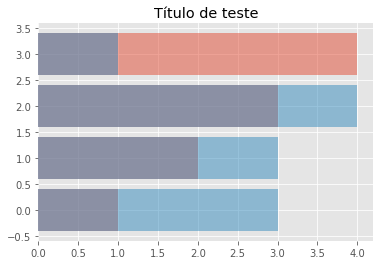

In [36]:
df.plot(kind='barh', remove_frames='all', title='Título de teste', alpha=0.5, style='ggplot')

In [136]:
for coluna in lista_colunas:
    ax.plot(d[coluna])

['Accent',
 'Accent_r',
 'Blues',
 'Blues_r',
 'BrBG',
 'BrBG_r',
 'BuGn',
 'BuGn_r',
 'BuPu',
 'BuPu_r',
 'CMRmap',
 'CMRmap_r',
 'Dark2',
 'Dark2_r',
 'GnBu',
 'GnBu_r',
 'Greens',
 'Greens_r',
 'Greys',
 'Greys_r',
 'OrRd',
 'OrRd_r',
 'Oranges',
 'Oranges_r',
 'PRGn',
 'PRGn_r',
 'Paired',
 'Paired_r',
 'Pastel1',
 'Pastel1_r',
 'Pastel2',
 'Pastel2_r',
 'PiYG',
 'PiYG_r',
 'PuBu',
 'PuBuGn',
 'PuBuGn_r',
 'PuBu_r',
 'PuOr',
 'PuOr_r',
 'PuRd',
 'PuRd_r',
 'Purples',
 'Purples_r',
 'RdBu',
 'RdBu_r',
 'RdGy',
 'RdGy_r',
 'RdPu',
 'RdPu_r',
 'RdYlBu',
 'RdYlBu_r',
 'RdYlGn',
 'RdYlGn_r',
 'Reds',
 'Reds_r',
 'Set1',
 'Set1_r',
 'Set2',
 'Set2_r',
 'Set3',
 'Set3_r',
 'Spectral',
 'Spectral_r',
 'Wistia',
 'Wistia_r',
 'YlGn',
 'YlGnBu',
 'YlGnBu_r',
 'YlGn_r',
 'YlOrBr',
 'YlOrBr_r',
 'YlOrRd',
 'YlOrRd_r',
 'afmhot',
 'afmhot_r',
 'autumn',
 'autumn_r',
 'binary',
 'binary_r',
 'bone',
 'bone_r',
 'brg',
 'brg_r',
 'bwr',
 'bwr_r',
 'cividis',
 'cividis_r',
 'cool',
 'cool_r',
 'co

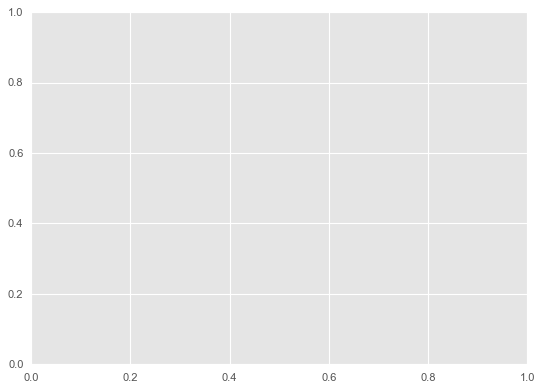

In [108]:
fig, ax = plt.subplots()

In [138]:
import numpy as np

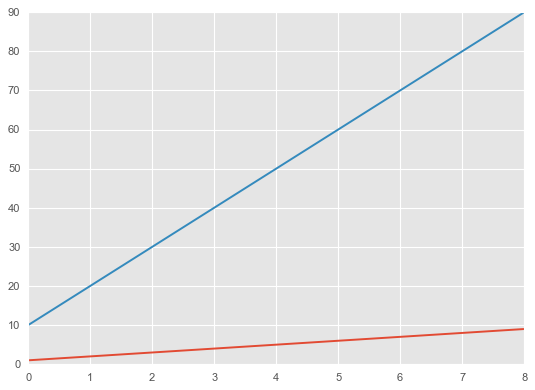

In [150]:
fig, ax = plt.subplots()
a = np.arange(1,10,step=1)
b = np.arange(10,100, step=10)

ax.plot(a)
ax.plot(b)

In [43]:
df.columns

{'b': 'string', 'a': 'double', 'c': 'int'}

In [44]:
df.info()

< macaco.DataFrame >
RangeIndex: 
Total of lines: 3
Data (3 columns):
b   3 non-null entries  string
a   3 non-null entries  double
c   3 non-null entries  int


In [45]:
df.tail(2)

['b', 'a', 'c']
['b', 2.1, 2]
['c', 3.0, 3]


## Importando o pacote Macaco

In [3]:
import macaco as mc

## Criando dataframe

In [4]:
df = mc.DataFrame({'b': ['a','b','c'], 'a': [1.1,2.1,3]})

In [5]:
df.columns

{'b': 'string', 'a': 'double'}

## Inserindo mais uma coluna

In [9]:
df.addColumn([1,2,3],'c')

## Retornando coluna

In [10]:
df.getColumn('c')

[1, 2, 3]

## Removendo coluna

In [11]:
df.popColumn('c')

In [12]:
df.columns

{'b': 'string', 'a': 'double'}